In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv("C:\\Users\\AANCHAL BORSE\\OneDrive\\Documents\\newpy\\train.csv.zip")


In [6]:
print(len(data))

42000


In [50]:
d = np.array(data)
x,y = d.shape
np.random.shuffle(d)
x_train = d[0:35700].T
y_train = x_train[0]
x_train = x_train[1:y]
x_train = x_train/255
x_test = d[35700:].T
y_test = x_test[0]
x_test = x_test[1:y]
x_test = x_test/255

In [51]:
print( x_train.shape,  x_test.shape)
n_x=x_train.shape[0]

(784, 35700) (784, 6300)


In [52]:
def  initialize_parameters( n_x  ):
    var = 2 / n_x  # variance
    W1 = np.random.rand(10, n_x) * np.sqrt(var)
    B1 = np.random.rand(10, 1) * np.sqrt(var)
    W2 = np.random.rand(10, 10) * np.sqrt(var)
    B2 = np.random.rand(10, 1) * np.sqrt(var)  
    return W1, B1, W2, B2

In [53]:
def relu(Z):
    return np.maximum(Z,0)

def softmx(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [54]:
def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1 
    A1 = relu(Z1) 
    Z2 = W2.dot(A1) + B2 
    A2 = softmx(Z2) 
    return Z1, A1, Z2, A2

In [55]:
def label_encoded (Y):
    label_encoded = np.zeros((Y.size, Y.max() + 1))
    label_encoded[np.arange(Y.size), Y] = 1
    label_encoded = label_encoded.T
    return label_encoded
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    prob_Y = label_encoded (Y)
    dZ2 = A2 - prob_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2)  
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)  
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 =1/m  * np.sum(dZ1)    
    return dW1, dB1, dW2, dB2

In [56]:
def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    return W1, B1, W2, B2

In [57]:
def get_predictions(A2):
    return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X, Y, epochs, alpha):
    W1, B1, W2, B2 =  initialize_parameters(n_x)
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 10 == 0 :
          print('epoch',i)
          predictions = get_predictions(A2)
          print('accuracy',get_accuracy(get_predictions(A2), Y))
    return W1, B1, W2, B2

In [58]:
W1, B1, W2, B2 = gradient_descent(x_train, y_train, 500, 0.05)

epoch 0
accuracy 0.1
epoch 10
accuracy 0.09843137254901961
epoch 20
accuracy 0.09843137254901961
epoch 30
accuracy 0.09843137254901961
epoch 40
accuracy 0.09851540616246499
epoch 50
accuracy 0.09943977591036414
epoch 60
accuracy 0.10913165266106442
epoch 70
accuracy 0.13644257703081233
epoch 80
accuracy 0.16817927170868346
epoch 90
accuracy 0.20271708683473388
epoch 100
accuracy 0.2757142857142857
epoch 110
accuracy 0.4185714285714286
epoch 120
accuracy 0.510812324929972
epoch 130
accuracy 0.5696918767507003
epoch 140
accuracy 0.605014005602241
epoch 150
accuracy 0.628095238095238
epoch 160
accuracy 0.6485714285714286
epoch 170
accuracy 0.6686274509803921
epoch 180
accuracy 0.6861624649859944
epoch 190
accuracy 0.7029411764705882
epoch 200
accuracy 0.7192436974789916
epoch 210
accuracy 0.7323249299719888
epoch 220
accuracy 0.7440616246498599
epoch 230
accuracy 0.754593837535014
epoch 240
accuracy 0.7633053221288515
epoch 250
accuracy 0.7712605042016807
epoch 260
accuracy 0.778543417366

In [59]:
def make_predictions(X, W1, B1, W2, B2):
    _,_,_,A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, B1, W2, B2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, B1, W2, B2)
    label = y_train[index]
    print("Prediction : ", prediction)
    print("Label : ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction :  [2]
Label :  5


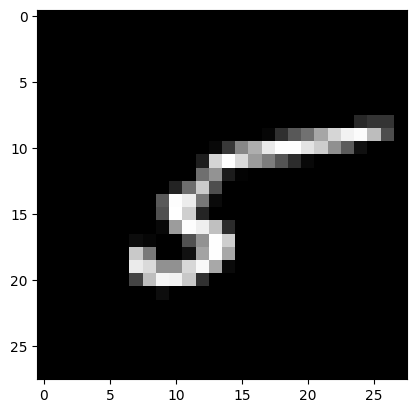

In [60]:
test_prediction(154, W1, B1, W2, B2,)